In [ ]:
import numpy as np
import torch
import tensorflow as tf
import random
import os
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set seed to every library
def set_random_seed(seed=13):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    print('SEED IS SET TO', seed)
set_random_seed()

SEED IS SET TO 13


In [ ]:
path = '/content/drive/MyDrive/TC_dataset/test.csv'
path2 = '/content/drive/MyDrive/TC_dataset/test_labels.csv'
path3 = '/content/drive/MyDrive/TC_dataset/train.csv'

test_df = pd.read_csv(path)
test_label_df = pd.read_csv(path2)
train_df = pd.read_csv(path3)

In [ ]:
# labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
# freq = 

# for label in labels:
    

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
a = train_df[labels].sum(axis=1).tolist()
print(a.count(0))
print(train_df[labels].sum())

143346
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


KeyError: ignored

In [ ]:
# max_words = 100000

# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(train_df.comment_text)
# sequences = tokenizer.texts_to_sequences(train_df.comment_text)

In [ ]:
vocab_size = 100000
seq_len = 180

train_sentc = train_df['comment_text'].values.tolist()
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size,output_mode='int', output_sequence_length=seq_len)
vectorize_layer.adapt(train_sentc)

vectorizer = tf.keras.models.Sequential()
vectorizer.add(tf.keras.Input(shape=(1,), dtype=tf.string))
vectorizer.add(vectorize_layer)

train_seq = vectorizer.predict(train_sentc)

In [ ]:
print(train_sentc[:2])
print(train_seq[:2])

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27", "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"]
[[  645    76     2   122   127   172    29   636  4604 11705  1282    83
    313    53  2076 11060    51  6599    16    62  2660   144     8  2808
     34   115  1152 15873  2858     5    46    55   235     2   415    31
      2    45    28   142    70  3405 80619     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

In [ ]:
print(len(vectorize_layer.get_vocabulary()))
print(vectorize_layer.get_vocabulary()[99900:])

100000
['8888aa', '886\u200e', '88591', '885', '8847360', '883\u200e', '882428498', '8821416510', '8819159146', '8810820922', '8781230195', '878', '877\u200e', '874', '87194421', '8718965193', '87146', '871143031', '8711272201', '86s', '8693230182', '8671855', '867', '8669672', '865\u200e', '86587', '8645202183', '8645196119', '8640217125', '86402144', '8640210125', '864020547', '864', '8628171246', '8618372219', '861829247', '8618264127', '8617940116', '86179113103', '8617617190', '8617616949', '8617611039', '8616491170', '8614720224', '86137201141', '8613673241', '86131167114', '8601', '86000', '85this', '85s', '85978133', '8597', '858\u200e', '858', '855\u200e', '855th', '8555743092', '85550', '8525555', '85237211189', '852', '851767368', '850\u200e', '8508', '85000', '8487969402', '844\u200e', '844', '8420369183', '8420335245', '8412780114', '8406', '83922813', '838\u200e', '837', '836\u200e', '835', '833', '832504441', '83170111154', '8313813690', '831025106', '830\u200e', '830', 

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train_labels = train_df[labels]

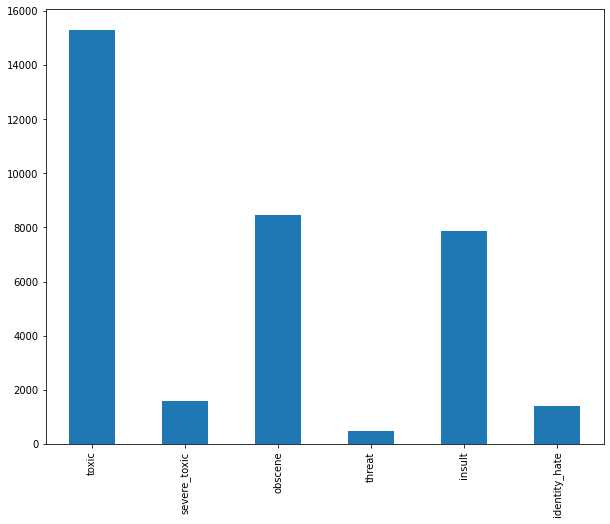

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=8
plt.rcParams["figure.figsize"] = fig_size

train_labels.sum(axis=0).plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_seq,train_labels,test_size=0.1, random_state = 10)

In [ ]:
y_train_list = [y_train[label].values for label in labels]
y_test_list = [y_test[label].values for label in labels]

In [ ]:
y_test_list

[array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
output_dim = 300
emb_dim = 100

class OutputBlock(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.dense = tf.keras.layers.Dense(32, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.flatten = tf.keras.layers.Flatten()
        self.out = tf.keras.layers.Dense(1, activation = 'sigmoid')
    
    def call(self, inputs):
        Z = inputs
        # Z = self.flatten(Z)
        Z = self.dense(Z)
        Z = self.dropout(Z)
        return self.out(Z)

inputs = tf.keras.layers.Input(shape = (seq_len,))
embed = tf.keras.layers.Embedding(vocab_size, emb_dim, input_length = seq_len, mask_zero=True)(inputs)
z = tf.keras.layers.Conv1D(output_dim, 3, padding='valid', activation='relu', strides=1)(embed)
z = tf.keras.layers.GlobalMaxPool1D()(z)
output_blocks = [OutputBlock(name = label) for label in labels]
outputs = []
for block in output_blocks:
    outputs.append(block(z))
model = tf.keras.models.Model(inputs=[inputs], outputs= outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 180, 100)     10000000    ['input_2[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 178, 300)     90300       ['embedding[0][0]']              
                                                                                                  
 global_max_pooling1d (GlobalMa  (None, 300)         0           ['conv1d[0][0]']                 
 xPooling1D)                                                                                  

In [ ]:
# output_dim = 300
# emb_dim = 20
# model = Sequential([
#   Embedding(vocab_size, emb_dim, input_length=seq_len),
#   Conv1D(output_dim, 3, padding='valid', activation='relu', strides=1),
#   Dropout(0.5),
#   GlobalMaxPool1D(),
#   Dense(6,activation = 'sigmoid')
# ])

In [ ]:
model.compile(optimizer='adam', 
              loss={label:"binary_crossentropy" for label in labels}, 
              metrics={label:tf.keras.metrics.AUC(name='auc') for label in labels})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 180, 100)     10000000    ['input_2[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 178, 300)     90300       ['embedding[0][0]']              
                                                                                                  
 global_max_pooling1d (GlobalMa  (None, 300)         0           ['conv1d[0][0]']                 
 xPooling1D)                                                                                  

In [ ]:
fp = '/content/checkpoints/model-conv1d.h5'

In [ ]:
callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=3),
    ModelCheckpoint(filepath='/content/checkpoints/model-conv1d.h5', save_best_only=True)
]

In [ ]:
history = model.fit(x_train, y_train_list,
                    class_weight = None,
                    epochs = 20,
                    validation_data=(x_test,y_test_list),
                    batch_size = 32,
                    callbacks = callbacks)

Epoch 1/20
4488/4488 [==============================] - 203s 38ms/step - loss: 0.3677 - toxic_loss: 0.1302 - severe_toxic_loss: 0.0293 - obscene_loss: 0.0704 - threat_loss: 0.0176 - insult_loss: 0.0830 - identity_hate_loss: 0.0371 - toxic_auc: 0.9544 - severe_toxic_auc: 0.9653 - obscene_auc: 0.9748 - threat_auc: 0.8469 - insult_auc: 0.9660 - identity_hate_auc: 0.9032 - val_loss: 0.2950 - val_toxic_loss: 0.1042 - val_severe_toxic_loss: 0.0223 - val_obscene_loss: 0.0520 - val_threat_loss: 0.0146 - val_insult_loss: 0.0685 - val_identity_hate_loss: 0.0334 - val_toxic_auc: 0.9703 - val_severe_toxic_auc: 0.9787 - val_obscene_auc: 0.9847 - val_threat_auc: 0.8957 - val_insult_auc: 0.9799 - val_identity_hate_auc: 0.9163 - lr: 0.0010
Epoch 2/20
4488/4488 [==============================] - 166s 37ms/step - loss: 0.2477 - toxic_loss: 0.0836 - severe_toxic_loss: 0.0229 - obscene_loss: 0.0466 - threat_loss: 0.0105 - insult_loss: 0.0589 - identity_hate_loss: 0.0252 - toxic_auc: 0.9831 - severe_toxic_

In [ ]:
cnn_model = tf.keras.models.load_model('/content/checkpoints/model-conv1d.h5', custom_objects={'OutputBlock':OutputBlock})
test_sentc = test_df['comment_text'].values.tolist()
test_seq = vectorizer.predict(test_sentc)

In [ ]:
# test_label_list = [test_label_df[label].values for label in labels]
metrics = cnn_model.evaluate(x_test,y_test_list)
print("{}: {}".format(model.metrics_names[0], metrics[0]))
print("{}: {}".format(model.metrics_names[1], metrics[1]))


499/499 [==============================] - 9s 16ms/step - loss: 0.2874 - toxic_loss: 0.1093 - severe_toxic_loss: 0.0232 - obscene_loss: 0.0511 - threat_loss: 0.0106 - insult_loss: 0.0666 - identity_hate_loss: 0.0266 - toxic_auc: 0.9635 - severe_toxic_auc: 0.9667 - obscene_auc: 0.9851 - threat_auc: 0.9321 - insult_auc: 0.9752 - identity_hate_auc: 0.9277
loss: 0.287364661693573
toxic_loss: 0.10926327854394913


In [ ]:
predictions = cnn_model.predict(test_seq)

In [ ]:
test_res = test_df.copy()
for label, y_pred in zip(labels, predictions):
    test_res[label] = y_pred
    
test_res.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.987641,2.470954e-02,0.792888,2.447200e-02,0.757193,1.791850e-01
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.000023,4.395067e-10,0.000014,3.000832e-09,0.000001,3.199962e-08
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.000726,1.393074e-06,0.000617,3.401517e-06,0.000112,1.271099e-05
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.000035,1.329680e-08,0.000152,2.605510e-06,0.000025,4.828441e-07
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.000114,1.798821e-07,0.000465,2.174833e-07,0.000046,8.783827e-06


In [ ]:
test_res.drop(['comment_text'],axis=1).to_csv('/content/submission.csv',index=False)
pd.read_csv('/content/submission.csv')

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.987641,2.470954e-02,0.792888,2.447200e-02,0.757193,1.791850e-01
1,0000247867823ef7,0.000023,4.395067e-10,0.000014,3.000832e-09,0.000001,3.199962e-08
2,00013b17ad220c46,0.000726,1.393074e-06,0.000617,3.401517e-06,0.000112,1.271099e-05
3,00017563c3f7919a,0.000035,1.329680e-08,0.000152,2.605510e-06,0.000025,4.828441e-07
4,00017695ad8997eb,0.000114,1.798821e-07,0.000465,2.174833e-07,0.000046,8.783827e-06
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.025728,1.212766e-06,0.001552,3.720464e-06,0.002045,1.275031e-04
153160,fffd7a9a6eb32c16,0.001090,5.796632e-07,0.000539,3.107861e-05,0.000072,2.933299e-05
153161,fffda9e8d6fafa9e,0.000217,9.943490e-09,0.000322,2.079587e-07,0.000023,1.765067e-06
153162,fffe8f1340a79fc2,0.002349,1.452384e-07,0.001088,3.662655e-05,0.000072,5.869391e-03


In [ ]:
# test_tokenizer = Tokenizer(num_words=max_words, lower=True)
# test_tokenizer.fit_on_texts(test_df.comment_text)
# test_sequences = test_tokenizer.texts_to_sequences(test_df.comment_text)
# test = pad_sequences(test_sequences, maxlen = maxlen)

In [ ]:
# test_labels = test_label_df[labels]
# metrics = cnn_model.evaluate(test,test_labels.)
# print("{}: {}".format(model.metrics_names[0], metrics[0]))
# print("{}: {}".format(model.metrics_names[1], metrics[1]))

In [ ]:
# prediction = cnn_model.predict(test)
# prediction

In [ ]:
# np.transpose(prediction).shape

In [ ]:
# test_res = test_df.copy()
# LB = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
# for label, y_pred in zip(LB, np.transpose(prediction)):
#     test_res.insert(len(test_res.columns),label,y_pred)

# test_res

In [ ]:
test_label_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

In [ ]:
test_df

In [ ]:
x_train

In [ ]:
train

In [ ]:
train_df

In [ ]:
from google.colab import files
files.download('/content/checkpoints/model-conv1d.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
! du -sh /content/checkpoints